In [1]:
import os
import zipfile

DATAPATH = os.path.abspath('../../data/')

In [2]:
DATAPATH

'C:\\Users\\Khachatur\\ML-practice\\CourseraDL\\data'

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.config.list_physical_devices('GPU') 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
path_cats_and_dogs = os.path.join(DATAPATH, "cats-and-dogs.zip")

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(DATAPATH)
zip_ref.close()

In [5]:
base_dir = os.path.join(DATAPATH, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [8]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
200/200 - 7s - loss: 0.6933 - accuracy: 0.5285 - val_loss: 0.6663 - val_accuracy: 0.6380
Epoch 2/100
200/200 - 4s - loss: 0.6423 - accuracy: 0.6195 - val_loss: 0.6085 - val_accuracy: 0.6820
Epoch 3/100
200/200 - 4s - loss: 0.5795 - accuracy: 0.6975 - val_loss: 0.5935 - val_accuracy: 0.6720
Epoch 4/100
200/200 - 4s - loss: 0.5361 - accuracy: 0.7290 - val_loss: 0.5664 - val_accuracy: 0.7100
Epoch 5/100
200/200 - 4s - loss: 0.5137 - accuracy: 0.7490 - val_loss: 0.5485 - val_accuracy: 0.7190
Epoch 6/100
200/200 - 4s - loss: 0.4599 - accuracy: 0.7905 - val_loss: 0.6761 - val_accuracy: 0.6500
Epoch 7/100
200/200 - 4s - loss: 0.4375 - accuracy: 0.7940 - val_loss: 0.5658 - val_accuracy: 0.7240
Epoch 8/100
200/200 - 4s - loss: 0.4006 - accuracy: 0.8160 - val_loss: 0.6119 - val_accuracy: 0.7030
Epoch 9/100
200/200 - 4s - loss: 0.3667 - accuracy: 0.8400 - val_loss: 0.5757 - val_accuracy: 0.7270
Epoch 10/100
200/200 - 4s - loss: 0.3413 - accuracy: 0.8525 - val_loss: 0.6086 - val_accura

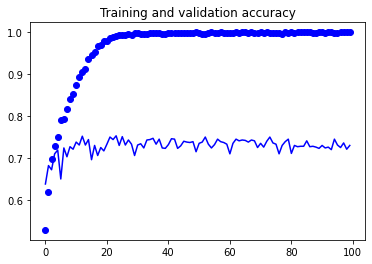

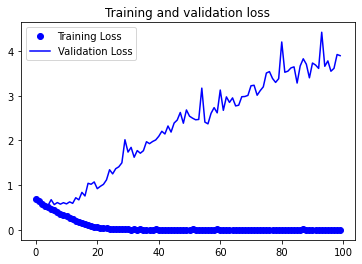

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Augmented

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
200/200 - 20s - loss: 0.6365 - accuracy: 0.6445 - val_loss: 0.5557 - val_accuracy: 0.7350
Epoch 2/100
200/200 - 22s - loss: 0.6121 - accuracy: 0.6840 - val_loss: 0.5278 - val_accuracy: 0.7240
Epoch 3/100
200/200 - 23s - loss: 0.5970 - accuracy: 0.6905 - val_loss: 0.5410 - val_accuracy: 0.7290
Epoch 4/100
200/200 - 22s - loss: 0.5942 - accuracy: 0.7005 - val_loss: 0.5839 - val_accuracy: 0.7340
Epoch 5/100
200/200 - 27s - loss: 0.5794 - accuracy: 0.7040 - val_loss: 0.5286 - val_accuracy: 0.7460
Epoch 6/100
200/200 - 27s - loss: 0.5731 - accuracy: 0.7135 - val_loss: 0.5292 - val_accuracy: 0.7560
Epoch 7/100
200/200 - 27s - loss: 0.5591 - accuracy: 0.7225 - val_loss: 0.5397 - val_accuracy: 0.7500
Epoch 8/100
200/200 - 23s - loss: 0.5595 - accuracy: 0.7195 - val_loss: 0.5157 - val_accuracy: 0.7470
Epoch 9/100
200/200 - 24s - loss: 0.5608 - accuracy: 0.7245 - val_loss: 0.4882 - val_accuracy: 0.7690
Epoch 10/100
200/200 - 23s - loss: 0.5509 - accuracy: 0.7250 - val_loss: 0.5384 - 

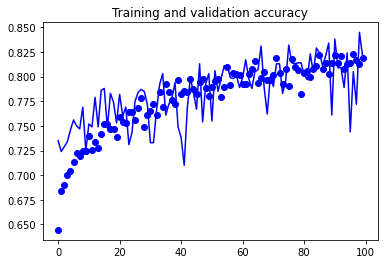

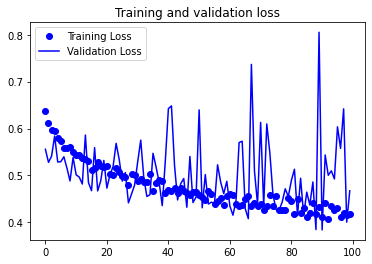

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()